In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('D:/Users/dell1/Desktop/CERTIFICATES/Deep learning/SOM/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')

# Data Preprocessing

In [3]:
#Checking the missing values
data.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
#Taking the independent variable only
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

# Training the SOM

In [7]:
#Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10,input_len=15,sigma=1.0, learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

# Visualizing the Result


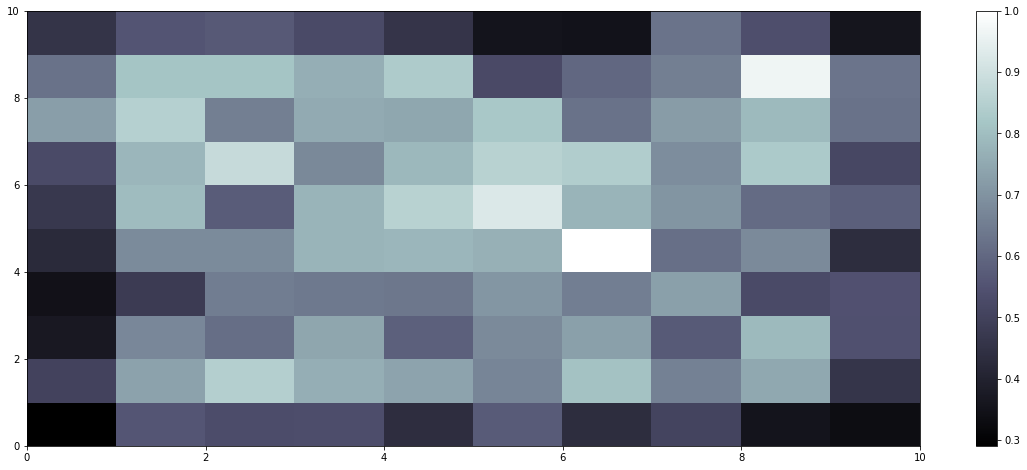

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize=(20,8))
bone()
pcolor(som.distance_map().T,)
colorbar()

# Finding the Frauds

In [10]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(6,4)],mappings[(8,8)]),axis=0)

In [11]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5590434e+07, 0.0000000e+00, 2.5000000e+01, 8.7500000e-01,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0400000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 5.8610000e+03],
       [1.5593345e+07, 0.0000000e+00, 3.8580000e+01, 5.0000000e+00,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 1.3500000e+01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 9.8000000e+02, 1.0000000e+00],
       [1.5646190e+07, 0.0000000e+00, 6.0580000e+01, 1.6500000e+01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.1000000e+01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.1000000e+01, 1.0562000e+04],
       [1.5689692e+07, 0.0000000e+00, 2.8580000e+01, 1.6650000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.4150000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [12]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15590434.0,0.0,25.00,0.875,2.0,14.0,8.0,1.040,1.0,0.0,0.0,1.0,2.0,160.0,5861.0
1,15593345.0,0.0,38.58,5.000,2.0,13.0,4.0,13.500,1.0,0.0,0.0,1.0,2.0,980.0,1.0
2,15646190.0,0.0,60.58,16.500,2.0,11.0,4.0,11.000,1.0,0.0,0.0,1.0,2.0,21.0,10562.0
3,15689692.0,0.0,28.58,1.665,2.0,11.0,4.0,2.415,1.0,0.0,0.0,1.0,2.0,440.0,1.0
4,15672357.0,0.0,37.75,5.500,2.0,11.0,4.0,0.125,1.0,0.0,0.0,1.0,2.0,228.0,1.0
5,15719940.0,0.0,35.17,3.750,2.0,1.0,1.0,0.000,0.0,1.0,6.0,0.0,2.0,0.0,201.0
6,15711742.0,0.0,23.00,1.835,2.0,5.0,3.0,0.000,0.0,1.0,1.0,0.0,2.0,200.0,54.0
7,15761733.0,0.0,16.08,0.335,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,160.0,127.0
8,15770995.0,0.0,40.33,8.125,1.0,4.0,4.0,0.165,0.0,1.0,2.0,0.0,2.0,184.0,19.0
9,15736399.0,0.0,36.58,0.290,2.0,1.0,1.0,0.000,0.0,1.0,10.0,0.0,2.0,200.0,19.0


* These are the customesrs who have fraud (assuming distance to be 1.0) with customer id in the first column.

# Making a hybrid model which can predict the frauds

In [13]:
#Getting the coordinates in which weights is >0.75
mappings = som.win_map(x)
for i in np.arange(10):
    for j in np.arange(10):
        if som.distance_map()[i,j] > 0.75:
            if mappings[(i,j)] != []:
                print(i,j)

1 5
1 6
1 7
1 8
2 1
2 6
2 8
3 5
3 7
3 8
4 4
4 5
4 6
4 8
5 4
5 5
5 6
5 7
6 1
6 4
6 5
6 6
8 2
8 7
8 8


In [14]:
frauds = np.concatenate((mappings[(1,5)],mappings[(1,6)],mappings[(1,7)],mappings[(1,8)],mappings[(2,1)],mappings[(2,6)],
                         mappings[(2,8)],mappings[(3,5)],
                        mappings[(4,4)],mappings[(4,5)],mappings[(4,6)],mappings[(4,8)],mappings[(5,4)],mappings[(5,5)],mappings[(5,6)],
                    mappings[(5,7)],mappings[(6,1)],
                        mappings[3,7],mappings[(3,8)],mappings[(6,4)],mappings[(6,5)],
                       mappings[(6,6)],mappings[(6,8)],mappings[(8,7)],mappings[(8,2)]),axis=0)

In [15]:
#Creating the matrix of features
customers = data.iloc[:,1:-1]

In [16]:
#Label Encoding the variable
col = ['A4','A5','A6','A12']
customers = pd.get_dummies(customers,columns=col)
customers.columns

Index(['A1', 'A2', 'A3', 'A7', 'A8', 'A9', 'A10', 'A11', 'A13', 'A14', 'A4_1',
       'A4_2', 'A4_3', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_1',
       'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_1',
       'A12_2', 'A12_3'],
      dtype='object')

In [17]:
customers = customers.values

In [18]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
customers = scl.fit_transform(customers)

In [19]:
#Creating the dependent variable
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in sc.inverse_transform(frauds):
        is_fraud[i] = 1

In [20]:
#Initialize the ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [21]:
#Adding the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [22]:
#Adding the 2nd hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [23]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [24]:
#Compiling the ANN
ann.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['Accuracy'])

In [25]:
#Training the ANN
ann.fit(customers,is_fraud,epochs=25,batch_size =32)

Epoch 1/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6800 - Accuracy: 0.5754
Epoch 2/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6659 - Accuracy: 0.6130
Epoch 3/25
22/22 [==============================] - 0s 774us/step - loss: 0.6566 - Accuracy: 0.6377
Epoch 4/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6489 - Accuracy: 0.6565
Epoch 5/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6432 - Accuracy: 0.6623
Epoch 6/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6387 - Accuracy: 0.6594
Epoch 7/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6344 - Accuracy: 0.6594
Epoch 8/25
22/22 [==============================] - 0s 615us/step - loss: 0.6308 - Accuracy: 0.6594
Epoch 9/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6270 - Accuracy: 0.6551
Epoch 10/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6231 - Accuracy: 0.6551
Epoch 11/25
22/

In [26]:
#Prediction for customer
y_pred = ann.predict(customers)

In [27]:
#Creating dataframe with probabilty of being fraud for each customer
y_pred = pd.DataFrame(np.concatenate((data.iloc[:,0:1].values,np.round(y_pred,3)),axis=1),columns=['CustomerID','Probability'])

In [28]:
y_pred

,CustomerID,Probability
0,15776156.0,0.230
1,15739548.0,0.335
2,15662854.0,0.380
3,15687688.0,0.199
4,15715750.0,0.459
...,...,...
685,15808223.0,0.412
686,15769980.0,0.275
687,15675450.0,0.306
688,15776494.0,0.247


In [29]:
#Saving the model
ann.save('ann.hdf5')

In [30]:
#Loading the model
loaded_model = tf.keras.models.load_model('ann.hdf5')

In [31]:
loaded_model.predict(customers)

array([[2.30333775e-01],
       [3.35254759e-01],
       [3.79547179e-01],
       [1.99343592e-01],
       [4.58988965e-01],
       [2.45292127e-01],
       [2.08081543e-01],
       [2.22400665e-01],
       [4.99103069e-02],
       [1.91503823e-01],
       [3.88405949e-01],
       [2.90094644e-01],
       [2.39248753e-01],
       [3.83281469e-01],
       [4.80102062e-01],
       [1.88629210e-01],
       [5.03902853e-01],
       [4.32434499e-01],
       [2.04408795e-01],
       [5.39241672e-01],
       [3.60518008e-01],
       [3.86104524e-01],
       [1.49784416e-01],
       [3.16570789e-01],
       [1.90534979e-01],
       [2.01229692e-01],
       [2.19152033e-01],
       [2.36827970e-01],
       [4.73368555e-01],
       [4.80122447e-01],
       [3.17245901e-01],
       [1.25143856e-01],
       [2.94419646e-01],
       [2.95460522e-01],
       [4.80102062e-01],
       [8.79211724e-02],
       [3.00876081e-01],
       [5.14472365e-01],
       [4.80102062e-01],
       [4.80102062e-01],


In [41]:
#Saving the scaled model
import pickle
filename = 'trained_model_scaled.sav'
pickle.dump(scl,open(filename,'wb'))

In [42]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled','rb'))

In [43]:
loaded_model_scaled.transform(customers)

array([[  0.02242643,  -2.73280948,  -0.68581296, ...,  -1.39012637,
         -1.99686836,  -1.12003628],
       [ -4.56004065,  -2.7286041 ,  -0.8660427 , ...,  -1.39012637,
         -1.99686836,  -1.12003628],
       [ -4.56004065,  -2.67935125,  -1.07819655, ...,  -1.39012637,
         -1.99686836,  -1.12003628],
       ...,
       [ -4.56004065,  -2.75597472,  -0.76340065, ...,  -1.39012637,
         -1.99686836,  -1.12003628],
       [ -4.56004065,  -2.69474722,  -0.56296578, ...,  -1.39012637,
         -1.99686836,  -1.12003628],
       [  0.02242643,  -2.59795219,  -1.14729808, ...,  11.80518418,
        -13.71625298,  -1.12003628]])

In [44]:
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
